# Read and answer the questions given below

#### An Example From The Text Book Probability And Statistics For Engineering By J Devorse

The cetane number is a critical property in specifying the ignition quality of a fuel
used in a diesel engine. Determination of this number for a biodiesel fuel is expensive and time-consuming. The article “Relating the Cetane Number of Biodiesel Fuels to Their Fatty Acid Composition: A Critical Study” (J. of Automobile Engr.,
2009: 565–583) included the following data on $x = iodine \ value(g) $ and $y = cetane \ number $ for a sample of 14 biofuels. The iodine value is the amount of iodine necessary to saturate a sample of 100 g of oil. The article’s authors fit the simple linear
regression model to this data, so let’s follow their lead.

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 132.0 & 129.0 & 120.0 & 113.2 & 105.0 & 92.0 & 84.0 & 83.2 & 88.4 & 59.0 & 80.0 & 81.5 & 71.0 & 69.2  \\
\hline
y & 46.0 & 48.0 & 51.0 & 52.1 & 54.0 & 52.0 & 59.0 & 58.7 & 61.6 & 64.0 & 61.4 & 54.6 & 58.8 & 58.0 \\
\hline
\end{array}
$$


1) Fit the model
2) Find predicted values or points on the regression line
3) Draw the regression line
4) Find the coefficients 
5) Equation of the line 
6) Predict Y cetane number when X the iodine value is 100

In [1]:
# Importing modules 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0) Creating DataFrame, Plot (X,Y) and Correlation between X and Y

In [2]:
# Create DataFrame for the data

X = [132.0,129.0,120.0,113.2,105.0,92.0,84.0,83.2,88.4,59.0,80.0,81.5,71.0,69.2]
Y = [46.0,48.0, 51.0,52.1,54.0,52.0,59.0,58.7,61.6,64.0,61.4,54.6,58.8,58.0]

df = pd.DataFrame({'X': X, 'Y': Y})

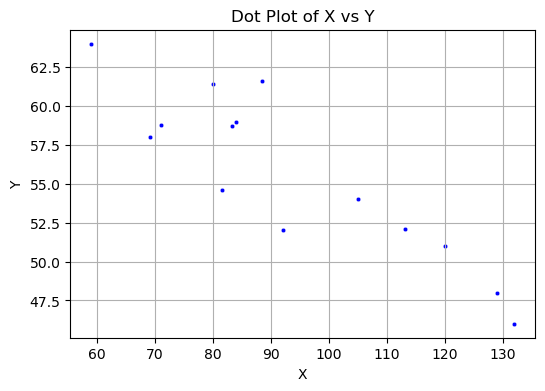

In [3]:
# Plot (X,Y)

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='X', y='Y', s=10, color="blue", marker="o")
plt.title("Dot Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [4]:
# Corrleation 

correlation = df.corr()
correlation

,X,Y
X,1.000000,-0.889247
Y,-0.889247,1.000000


## 1) Fit the model

In [5]:
# Fit the regression  line 
from sklearn.linear_model import LinearRegression

In [6]:
X = df['X'].values
Y = df['Y'].values

In [7]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [8]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

## 2) Predicted values or points on the regression line

In [9]:
# Predicted values i.e points on the regressive line
df['Predicted_Y'] = regressor.predict(X)

In [10]:
df

,X,Y,Predicted_Y
0,132.0,46.0,47.573293
1,129.0,48.0,48.201455
2,120.0,51.0,50.085942
3,113.2,52.1,51.509776
4,105.0,54.0,53.226753
5,92.0,52.0,55.948790
6,84.0,59.0,57.623889
7,83.2,58.7,57.791399
8,88.4,61.6,56.702584
9,59.0,64.0,62.858574


## 3) The regression line


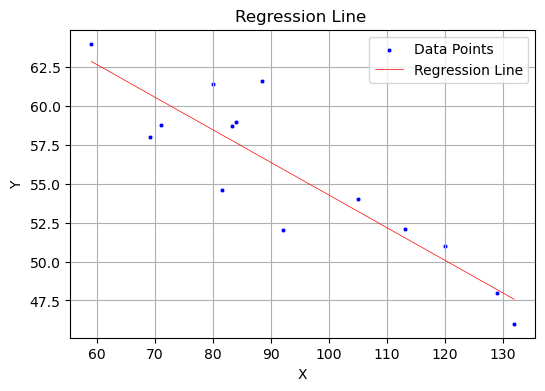

In [11]:
# Plot the data and the regression line

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='X', y='Y', s=10, color="blue", label='Data Points')
sns.lineplot(data=df, x='X', y='Predicted_Y', color="red", linewidth=0.5, label='Regression Line')
plt.title('Regression Line ')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## 4) Coefficients of Regression line

In [12]:
# Coefficents of regressiion line 

slope = regressor.coef_[0]  # Slope of the regression line
intercept = regressor.intercept_  # Intercept of the regression line


print('Slope of regression line is ', slope)
print('Y intercept of regression line is ', intercept)

Slope of regression line is  [-0.20938742]
Y intercept of regression line is  [75.21243193]


## 5) Equation of Regression Line 

In [13]:
# Equation regression line is 

print("Equation of the regression line is Y = -0.20938742 X + 75.21243193:")

Equation of the regression line is Y = -0.20938742 X + 75.21243193:


-----------

## 6) Predict the value of Y the 𝑐𝑒𝑡𝑎𝑛𝑒 𝑛𝑢𝑚𝑏𝑒𝑟 when X 𝑖𝑜𝑑𝑖𝑛𝑒 𝑣𝑎𝑙𝑢𝑒 is 100

In [14]:
X_new = np.array([[100]])  
predicted_Y_new = regressor.predict(X_new)
predicted_Y_new

array([[54.27369028]])

--------
----------

#### Extrapolation

The least squares line should not be used to make a prediction for an x value
much beyond the range of the data, such as $x = 40 $ or $x = 150$ in above example. The
danger of extrapolation is that the fitted relationship (a line here) may not be valid
for such x values.

## Calculate $R^2$ value for the fit

In [16]:
r_squared = regressor.score(X, Y)
r_squared

0.7907602362991257

That is, 79.1% of the observed variation in cetane number is attributable to (can be
explained by) the simple linear regression relationship between cetane number and
iodine value ($R^2$ values are even higher than this in many scientific contexts, but
social scientists would typically be ecstatic at a value anywhere near this large!)